In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import os

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
train_data = pd.read_csv("datasets/train.csv")
test_data = pd.read_csv("datasets/test.csv")

movie_data = [train_data,test_data]
final_data = pd.concat(movie_data)

split_1 = int(0.8 * len(final_data))
split_2 = int(0.9 * len(final_data))
train_data = final_data[:split_1]
test_data = final_data[split_2:]

In [3]:
train_data.info

<bound method DataFrame.info of                                                     text sentiment
0      Now, I won't deny that when I purchased this o...       neg
1      The saddest thing about this "tribute" is that...       neg
2      Last night I decided to watch the prequel or s...       neg
3      I have to admit that i liked the first half of...       neg
4      I was not impressed about this film especially...       neg
...                                                  ...       ...
14995  Reading through most of the other reviews, I t...       neg
14996  Like many western Pennsylvania history buffs, ...       neg
14997  For all its wonderful images, for all of its g...       neg
14998  Hadn't really heard too much about this movie ...       neg
14999  This is definitely an excellent show. I don't ...       pos

[40000 rows x 2 columns]>

In [4]:
test_data.info

<bound method DataFrame.info of                                                     text sentiment
20000  This movie is not a remake of She's all That (...       neg
20001  Theres not much you can really say about this ...       neg
20002  Admittedly, there are some scenes in this movi...       pos
20003  Diane Lane, Mickey Rourke, Rosario Dawson & Th...       neg
20004  A rather disappointing film. The club scenes w...       neg
...                                                  ...       ...
24995  For one thing, he produced this movie. It has ...       neg
24996  The title comes from an alteration an adolesce...       pos
24997  Christopher Nolan's first film is a 'no budget...       pos
24998  The story is shortly about the faith-lacking b...       neg
24999  I found parts of this movie rather slow, espec...       pos

[5000 rows x 2 columns]>

In [5]:
train_data.head(5)

,text,sentiment
0,"Now, I won't deny that when I purchased this o...",neg
1,"The saddest thing about this ""tribute"" is that...",neg
2,Last night I decided to watch the prequel or s...,neg
3,I have to admit that i liked the first half of...,neg
4,I was not impressed about this film especially...,neg


In [6]:
test_data.head(5)    

,text,sentiment
20000,This movie is not a remake of She's all That (...,neg
20001,Theres not much you can really say about this ...,neg
20002,"Admittedly, there are some scenes in this movi...",pos
20003,"Diane Lane, Mickey Rourke, Rosario Dawson & Th...",neg
20004,A rather disappointing film. The club scenes w...,neg


In [7]:
sentiment_int = []
for index, row  in train_data.iterrows():
    if row['sentiment'] == 'pos':
        sentiment_int.append(1)
    else:
        sentiment_int.append(0)

train_data["sentiment_int"] = sentiment_int


sentiment_int = []
for index, row  in test_data.iterrows():
    if row['sentiment'] == 'pos':
        sentiment_int.append(1)
    else:
        sentiment_int.append(0)

test_data["sentiment_int"] = sentiment_int

C:\Users\Divy Solanki\AppData\Local\Temp\ipykernel_26820\1172610502.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data["sentiment_int"] = sentiment_int
C:\Users\Divy Solanki\AppData\Local\Temp\ipykernel_26820\1172610502.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data["sentiment_int"] = sentiment_int


In [8]:
train_data.head(10)

,text,sentiment,sentiment_int
0,"Now, I won't deny that when I purchased this o...",neg,0
1,"The saddest thing about this ""tribute"" is that...",neg,0
2,Last night I decided to watch the prequel or s...,neg,0
3,I have to admit that i liked the first half of...,neg,0
4,I was not impressed about this film especially...,neg,0
5,"The original movie, The Odd Couple, has some w...",pos,1
6,"This was a great movie with a good cast, all o...",pos,1
7,"I'm a sucker for a good romance, but this one ...",neg,0
8,"Fast-paced, funny, sexy, and spectacular. Cagn...",pos,1
9,"The proverb ""Never judge a book by it's cover""...",neg,0


In [9]:
test_data.head(10)

,text,sentiment,sentiment_int
20000,This movie is not a remake of She's all That (...,neg,0
20001,Theres not much you can really say about this ...,neg,0
20002,"Admittedly, there are some scenes in this movi...",pos,1
20003,"Diane Lane, Mickey Rourke, Rosario Dawson & Th...",neg,0
20004,A rather disappointing film. The club scenes w...,neg,0
20005,Too bad Mike Meyers picked this for his dramat...,neg,0
20006,This is one of my favourite books and I rememb...,pos,1
20007,"The three-part series ended last night on PBS,...",pos,1
20008,I bought the DVD a long time ago and finally g...,pos,1
20009,"The Squire of Gothos is one of the ""sillier"" e...",pos,1


In [10]:
nRow, nCol = train_data.shape
print(f'There are {nRow} rows and {nCol} columns of training data') 

There are 40000 rows and 3 columns of training data


In [11]:
nRow, nCol = test_data.shape
print(f'There are {nRow} rows and {nCol} columns of test data')

There are 5000 rows and 3 columns of test data


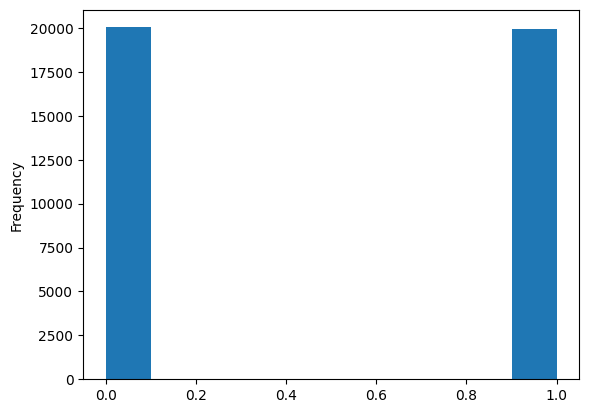

In [12]:
train_data['sentiment_int'].plot.hist()
plt.show()

<Axes: ylabel='Frequency'>

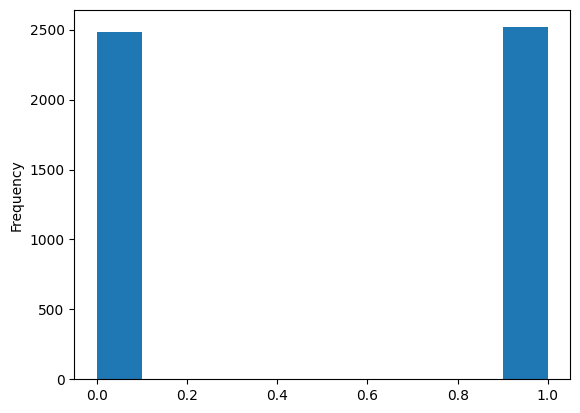

In [13]:
test_data['sentiment_int'].plot.hist()

In [14]:
train_len = len(train_data)
print('total train records:', train_len)

pos_len = len(train_data[train_data['sentiment_int'] == 1])
neg_len = len(train_data[train_data['sentiment_int'] == 0])

print ('positive records:', pos_len)
print ('negative records:', neg_len)

total train records: 40000
positive records: 19955
negative records: 20045


In [15]:
test_len = len(test_data)
print('total train records:', test_len)

pos_len = len(test_data[test_data['sentiment_int'] == 1])
neg_len = len(test_data[test_data['sentiment_int'] == 0])

print ('positive records:', pos_len)
print ('negative records:', neg_len)

total train records: 5000
positive records: 2517
negative records: 2483


In [16]:
train_data.isnull().sum()

text             0
sentiment        0
sentiment_int    0
dtype: int64

In [17]:
train_data["text"] = train_data["text"].str.lower()
train_data

C:\Users\Divy Solanki\AppData\Local\Temp\ipykernel_26820\1444562034.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data["text"] = train_data["text"].str.lower()


,text,sentiment,sentiment_int
0,"now, i won't deny that when i purchased this o...",neg,0
1,"the saddest thing about this ""tribute"" is that...",neg,0
2,last night i decided to watch the prequel or s...,neg,0
3,i have to admit that i liked the first half of...,neg,0
4,i was not impressed about this film especially...,neg,0
...,...,...,...
14995,"reading through most of the other reviews, i t...",neg,0
14996,"like many western pennsylvania history buffs, ...",neg,0
14997,"for all its wonderful images, for all of its g...",neg,0
14998,hadn't really heard too much about this movie ...,neg,0


In [18]:
train_data

,text,sentiment,sentiment_int
0,"now, i won't deny that when i purchased this o...",neg,0
1,"the saddest thing about this ""tribute"" is that...",neg,0
2,last night i decided to watch the prequel or s...,neg,0
3,i have to admit that i liked the first half of...,neg,0
4,i was not impressed about this film especially...,neg,0
...,...,...,...
14995,"reading through most of the other reviews, i t...",neg,0
14996,"like many western pennsylvania history buffs, ...",neg,0
14997,"for all its wonderful images, for all of its g...",neg,0
14998,hadn't really heard too much about this movie ...,neg,0


In [19]:
X, y = train_data['text'], train_data['sentiment_int']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=33)

In [21]:
Tfid = TfidfVectorizer()
X_train_Tfid = Tfid.fit_transform(X_train)
X_test_Tfid = Tfid.transform(X_test)

In [38]:
with open('preprocessor.pkl', 'wb') as file_obj:
    pickle.dump(Tfid, file_obj)

In [22]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

# Put your artifacts directory here

In [23]:
os.chdir('Your path to artifacts directory')

In [24]:
%pwd

'c:\\Users\\Divy Solanki\\Desktop\\Text Summarization\\Sentiment-Analysis\\English Sentiment Analysis\\artifacts'

In [25]:
best_model_r2_score = 0.500

# You can add more models to it

In [26]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "Decision Tree": DecisionTreeRegressor(),
    # "Random Forest Regressor": RandomForestRegressor(),
    # "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model_names = list(models)
    model.fit(X_train_Tfid, y_train)

    y_train_pred = model.predict(X_train_Tfid)
    y_test_pred = model.predict(X_test_Tfid)
    

    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    r2_list.append(model_test_r2)
    
    if model_test_r2 > best_model_r2_score:
        pickle.dump(model, open(f"model_{model_names[i]}.pkl", "wb"))

Linear Regression
Lasso
Ridge
Decision Tree


In [27]:
pd.DataFrame(
    list(zip(model_list, r2_list)), 
    columns=['Model Name', 'R2_Score']).sort_values(
        by=["R2_Score"],
        ascending=False
    )

,Model Name,R2_Score
2,Ridge,0.600774
0,Linear Regression,0.099526
1,Lasso,-0.000037
3,Decision Tree,-0.144005


# Testing Code

In [30]:
# with open('model_Ridge.pkl', 'rb') as file_obj:
#     RidgeModel = pickle.load(file_obj)

In [44]:
# input_review = input('Enter your review: ') 
# mcom = {'text': [input_review]}
# print(mcom)
# mdf = pd.DataFrame(mcom, columns = ['text'])
# print(mdf)
# X_single = Tfid.transform(mdf['text'])
# y_single = RidgeModel.predict(X_single)
# print("review: ", y_single[0])
# if y_single >= 1:
#     print('positive review')
# else:
#     print('Negative')

{'text': ['Best Best Best']}
             text
0  Best Best Best
review:  1.225687755587564
positive review
